# The Fourier transform in 1 dimension

This interactive demo teaches the relationship between a 1D signal in real space, and it's 1D Fourier transform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
    
def draw_Fourier_1D(
    coefs_Fourier=None,
    preset='sine',
    pad_factor = 4,
    figsize=(16,4)
    ):
    """
    1D Fourier interactive example

    Args:
        TODO
    """
    
    # Hard corded inputs
    eps = 1e-8
    y_range_fft = (-0.05,1.05)
    
    # Default number of coefficients
    if coefs_Fourier is None:
        coefs_num = 64
    else:
        coefs_num = len(coefs_Fourier)
    
    # coordinates
    r = np.arange(0,coefs_num)
    q = np.fft.fftfreq(coefs_num, d=1.0)

    # Preset examples
    if preset == 'sine':
        sig = np.sin((2.0*np.pi*(1.0/16.0))*r)
    elif preset == 'cosine':
        sig = np.cos((2.0*np.pi*(1.0/16.0))*r)
    elif preset == 'wavepacket':
        sig = (np.cos((2.0*np.pi*(8.0/coefs_num))*r)**2) \
            * (np.sin((2.0*np.pi*(0.5/coefs_num))*r)**4)
    elif preset == 'wavepacket_broad':
        sig = (np.cos((2.0*np.pi*(8.0/coefs_num))*r)**2) \
            * np.abs(np.sin((2.0*np.pi*(0.5/coefs_num))*r)**1)
    elif preset == 'wavepacket_narrow':
        sig = (np.cos((2.0*np.pi*(8.0/coefs_num))*r)**2) \
            * (np.sin((2.0*np.pi*(0.5/coefs_num))*r)**16)    
    elif preset == 'atoms':
        sig = np.sin((2.0*np.pi*(4.0/coefs_num))*r)**8
    elif preset == 'atoms_surface':
        sig = (np.sin((2.0*np.pi*(4.0/coefs_num))*r)**8)*(r<coefs_num/2.0)
    elif preset == 'atoms_defect':
        sig = (np.sin((2.0*np.pi*(4.0/coefs_num))*r)**8)*(r<coefs_num/2.0) \
            + (np.cos((2.0*np.pi*(4.0/coefs_num))*r)**8)*(r>coefs_num*(7/16))*(r<coefs_num*(15/16))
    elif preset == 'two_sites':
        sig = 1.0*np.sin((2.0*np.pi*(2.0/coefs_num))*r)**16 \
            + 0.5*np.cos((2.0*np.pi*(2.0/coefs_num))*r)**16 - 0.295
    elif preset == 'two_sites_shift_left':
        sig = 1.0*np.sin((2.0*np.pi*(2.0/coefs_num))*r)**16 \
            + 0.5*np.cos((2.0*np.pi*(2.0/coefs_num))*(r+2))**16 - 0.295
    elif preset == 'two_sites_shift_right':
        sig = 1.0*np.sin((2.0*np.pi*(2.0/coefs_num))*r)**16 \
            + 0.5*np.cos((2.0*np.pi*(2.0/coefs_num))*(r-2))**16 - 0.295
    
    else:
        raise Exception("Preset not defined")

        
    # Fourier transform
    sig_fft = np.fft.fft(sig)
    
    # Padded real space signal
    r_pad = np.arange(0,coefs_num*pad_factor) / pad_factor
    
    sig_fft_pad = np.zeros((sig_fft.size*pad_factor), dtype='complex')
    sig_fft_pad[0:coefs_num//2] = sig_fft[0:coefs_num//2]
    sig_fft_pad[1-coefs_num//2+coefs_num*pad_factor:coefs_num*pad_factor] = sig_fft[1-coefs_num//2:]
    sig_pad = np.real(np.fft.ifft(sig_fft_pad)) * pad_factor
    
    
    # Get amlplitude and phases
    amp = np.abs(sig_fft)
    p = np.angle(sig_fft)
    h = np.mod(p[:,None]/(2.0*np.pi),1)
    s = np.ones((coefs_num,1))
    # v = (amp[:,None] > eps).astype('float')
    v = np.sqrt(amp[:,None] / np.max(amp))
    hsv = np.hstack((h,s,v))
    rgb = hsv_to_rgb(hsv)    
    
    # plots
    fig, ax = plt.subplots(1,2,figsize=figsize)
    
    # real space plot
    ax[0].plot(
        r_pad,
        sig_pad,
        color=(1,0,0),
    )
    ax[0].set_xlim((0,coefs_num))
    ax[0].set_ylim((-1.05,1.05))
    ax[0].set_title("Real Space Signal", size=20)

    # Fourier coefficients plot
    ax[1].scatter(
        q,
        amp,
        100,
        edgecolor=rgb,
        color=(1.0,1.0,1.0),
        marker='o',
        linewidth=2,
        zorder=1000,
    )
    for a0 in range(coefs_num):
        if amp[a0] > eps:
            ax[1].plot(
                np.array((q[a0], q[a0])),
                np.array((0, amp[a0])),
                linewidth=2,
                color=rgb[a0,:]
            )
  
    ax[1].set_xlim((-0.52,0.52))
    ax[1].set_ylim((y_range_fft[0]*np.max(amp), y_range_fft[1]*np.max(amp)))
    ax[1].set_title("Fourier Space Coefficients", size=20)
    
    
    # Draw the plot
    plt.show()
    

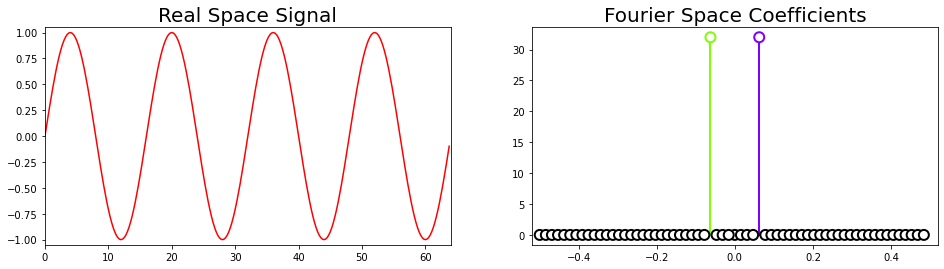

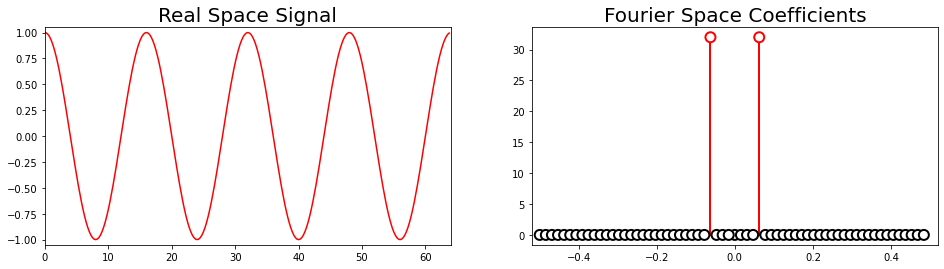

In [2]:
draw_Fourier_1D(preset='sine')
draw_Fourier_1D(preset='cosine')

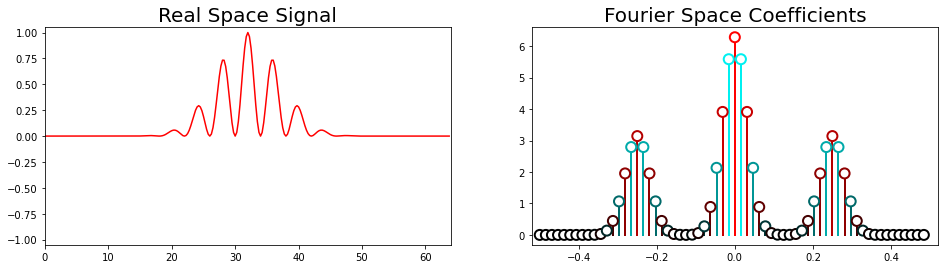

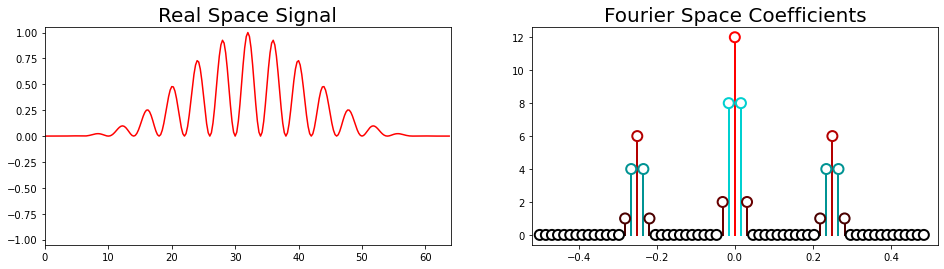

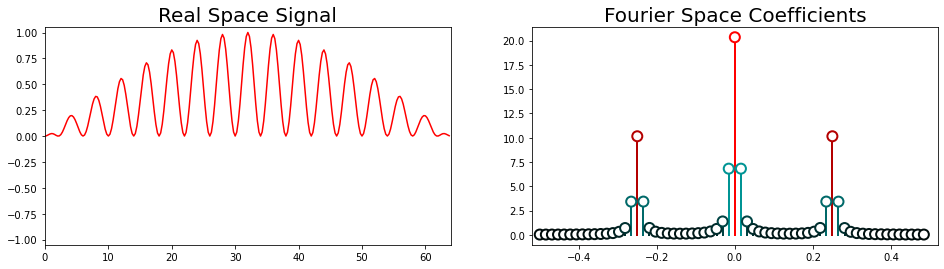

In [3]:
draw_Fourier_1D(preset='wavepacket_narrow')
draw_Fourier_1D(preset='wavepacket')
draw_Fourier_1D(preset='wavepacket_broad')

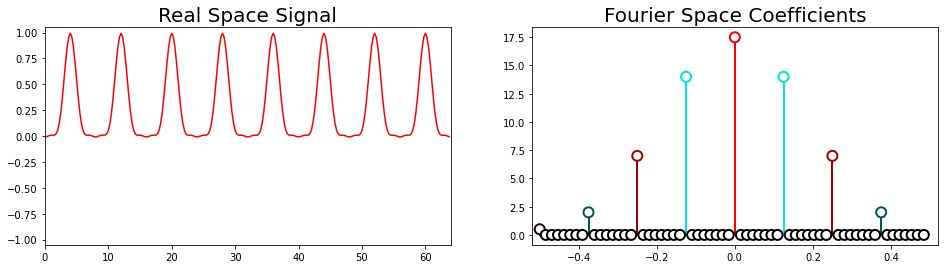

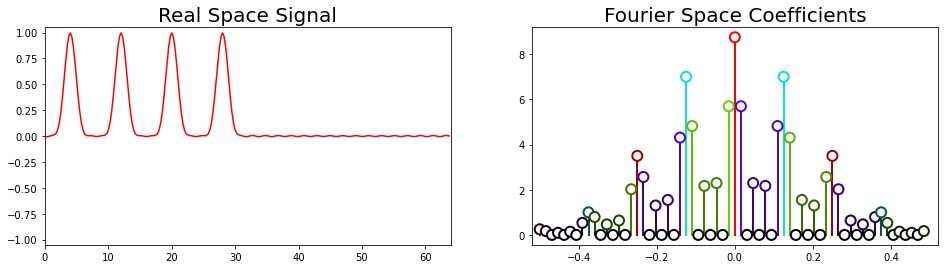

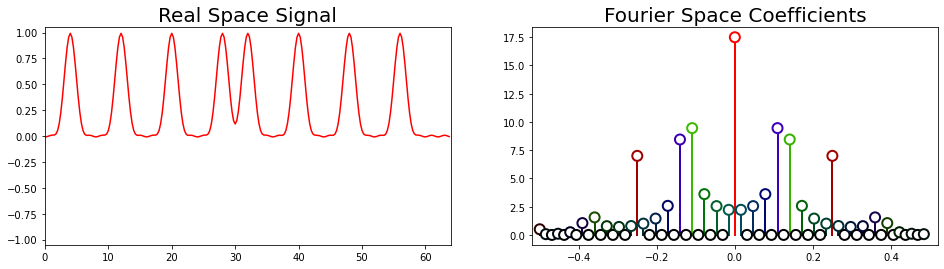

In [4]:
draw_Fourier_1D(preset='atoms')
draw_Fourier_1D(preset='atoms_surface')
draw_Fourier_1D(preset='atoms_defect')

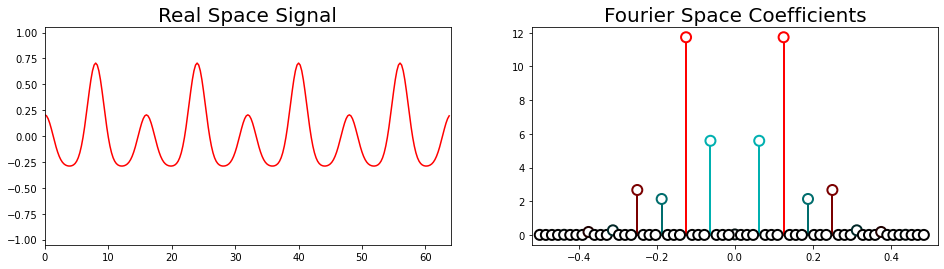

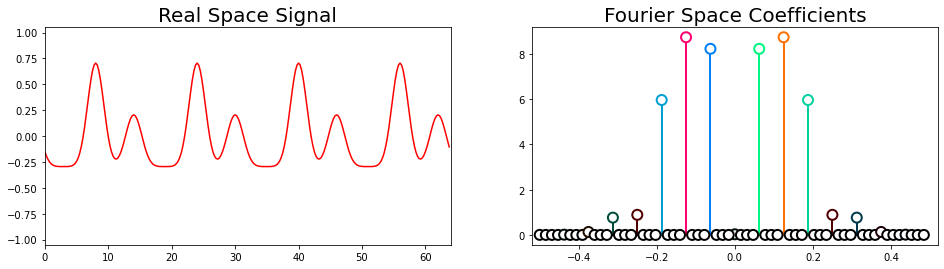

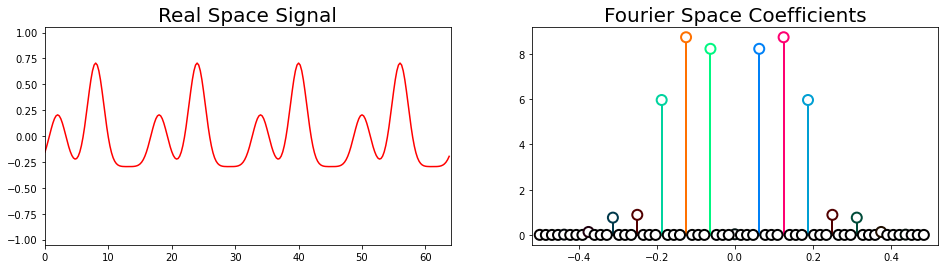

In [5]:
draw_Fourier_1D(preset='two_sites')
draw_Fourier_1D(preset='two_sites_shift_left')
draw_Fourier_1D(preset='two_sites_shift_right')